In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
center_mean = [0,0]
bottomleft_mean = [-10, -10]
topright_mean = [10, 10]
left_mean = [-10, 0]
right_mean = [10, 0]
bottom_mean = [0, -10]
top_mean = [0, 10]

X = np.random.multivariate_normal(center_mean, [[1, 0], [0, 1]], size=100)
X = np.concatenate((X, np.random.multivariate_normal(bottomleft_mean, [[1, 0], [0, 1]], size=100)))
X = np.concatenate((X, np.random.multivariate_normal(topright_mean, [[1, 0], [0, 1]], size=100)))
X = np.concatenate((X, np.random.multivariate_normal(left_mean, [[1, 0], [0, 1]], size=100)))
X = np.concatenate((X, np.random.multivariate_normal(right_mean, [[1, 0], [0, 1]], size=100)))
X = np.concatenate((X, np.random.multivariate_normal(top_mean, [[1, 0], [0, 1]], size=100)))
X = np.concatenate((X, np.random.multivariate_normal(bottom_mean, [[1, 0], [0, 1]], size=100)))



In [7]:
n = len(X)
k = 3
B = [X[np.random.choice(n)]]

In [8]:
def dist_to_B(x, return_closest_index=False):
    min_dist = np.inf
    closest_index = -1
    for i, b in enumerate(B):
        dist = np.linalg.norm(x - b)
        if dist < min_dist:
            min_dist = dist
            closest_index = i
    if return_closest_index:
        return min_dist, closest_index
    return min_dist

In [9]:
for _ in range(k-1):
    p = np.zeros(n)
    for i, x in enumerate(X):
        p[i] = dist_to_B(x) ** 2
    p = p / sum(p)
    B.append(X[np.random.choice(n, p=p)])

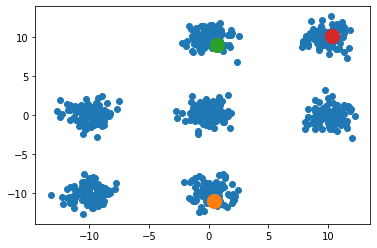

In [10]:
plt.scatter(X[:,0], X[:,1])
for b in B:
    plt.scatter(b[0], b[1], s=200)

In [11]:
alpha = 16 * (np.log2(k) + 2)
m = 3  # desired final number of points

In [12]:
c_phi = sum([dist_to_B(x) for x in X]) / n

In [13]:
B_i_totals = [0, 0, 0]
B_i = [np.empty_like(X) for _ in range(k)]
for x in X:
    _, closest_index = dist_to_B(x, return_closest_index=True)
    B_i[closest_index][B_i_totals[closest_index]] = x
    B_i_totals[closest_index] += 1

In [14]:
B_i_totals

[225, 276, 199]

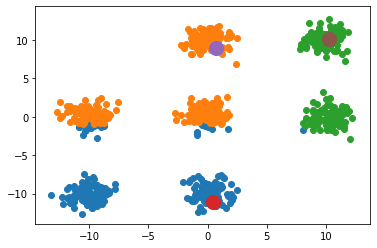

In [15]:
for i in range(k):
    plt.scatter(B_i[i][:B_i_totals[i],0], B_i[i][:B_i_totals[i],1])
for b in B:
    plt.scatter(b[0], b[1], s=200)

In [28]:
p = np.zeros(n)
for i, x in enumerate(X):
    p[i] = alpha * dist_to_B(x) / c_phi
    for Bi, B_i_total in zip(B_i, B_i_totals):
        for xprime in Bi:
            p[i] += 2 * alpha * dist_to_B(xprime) / (B_i_total * c_phi)
        p[i] += 4 * n / B_i_total

In [29]:
p = p / sum(p)

In [30]:
p

array([0.00174441, 0.00180125, 0.00170582, 0.00138388, 0.00168026,
       0.00142731, 0.00162097, 0.00160732, 0.00175883, 0.0017016 ,
       0.00150958, 0.00176958, 0.00166181, 0.0016718 , 0.0017036 ,
       0.00179097, 0.00155214, 0.00181813, 0.00171772, 0.00155419,
       0.00179021, 0.00180095, 0.00175653, 0.00151236, 0.00171428,
       0.00147136, 0.0017185 , 0.00171262, 0.00172048, 0.00151482,
       0.00167798, 0.00161751, 0.00152763, 0.00171558, 0.00162908,
       0.00166107, 0.00166475, 0.00156827, 0.00163165, 0.00166141,
       0.00149346, 0.00152899, 0.00164391, 0.00165954, 0.00161061,
       0.00167975, 0.00180854, 0.00176556, 0.00167797, 0.00178189,
       0.0015488 , 0.00162621, 0.00178279, 0.00171279, 0.00178543,
       0.00170687, 0.00144126, 0.00179632, 0.0017028 , 0.00174396,
       0.0018145 , 0.00172012, 0.00179019, 0.00162382, 0.00167442,
       0.00169313, 0.00157086, 0.00162479, 0.0016729 , 0.00175576,
       0.0013939 , 0.00168876, 0.00172709, 0.00176027, 0.00171

In [ ]:
np.random.choice(n, size=m, p=p)